In [1]:
import cobra

model = cobra.io.read_sbml_model('/data1/xpgeng/P1/model/'+ 'iML1515.xml')
bm    = str(model.objective.expression).split(' ')[0][4:]
state_ori   = cobra.flux_analysis.pfba(model)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [2]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [3]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.004565,0,0.00%
cl_e,EX_cl_e,0.004565,0,0.00%
cobalt2_e,EX_cobalt2_e,2.192E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006218,0,0.00%
fe2_e,EX_fe2_e,0.01409,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1712,0,0.00%
mg2_e,EX_mg2_e,0.007608,0,0.00%
mn2_e,EX_mn2_e,0.000606,0,0.00%
mobd_e,EX_mobd_e,6.139E-06,0,0.00%


In [4]:
O2_ori = model.medium['EX_o2_e']

In [5]:
O2_ori

1000.0

In [8]:
l1 = []
l2 = []
l3 = []

for j in range(31):
            
            try:
                medium = model.medium
                medium["EX_o2_e"] = j
                model.medium = medium

                state   = cobra.flux_analysis.pfba(model)
                biomass = round(state[bm], 3)
                etoh    = round(state['EX_etoh_e'], 3)
                print(j, biomass, etoh)
                l1.append(j)
                l2.append(biomass)
                l3.append(etoh)
            except:
                print(j)

0 0.158 8.746
1 0.197 7.498
2 0.236 6.2
3 0.275 4.901
4 0.314 3.603
5 0.353 2.304
6 0.393 1.006
7 0.431 0.0
8 0.464 0.0
9 0.498 0.0
10 0.532 0.0
11 0.565 0.0
12 0.599 0.0
13 0.633 0.0
14 0.666 0.0
15 0.692 0.0
16 0.718 0.0
17 0.744 0.0
18 0.77 0.0
19 0.796 0.0
20 0.822 0.0
21 0.848 0.0
22 0.874 0.0
23 0.877 0.0
24 0.877 0.0
25 0.877 0.0
26 0.877 0.0
27 0.877 0.0
28 0.877 0.0
29 0.877 0.0
30 0.877 0.0


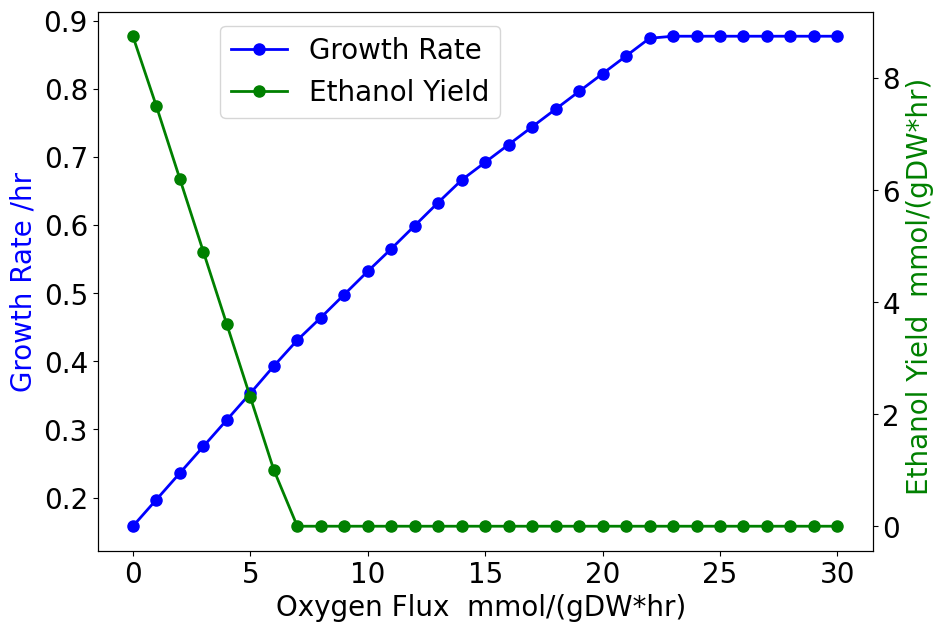

In [46]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

# Plot list1 vs list2 with blue color
line1 = ax1.plot(l1, l2, 'bo-', linewidth=2, markersize=8, label='Growth Rate')

# Plot list1 vs list3 with green color
line2 = ax2.plot(l1, l3, 'go-', linewidth=2, markersize=8, label='Ethanol Yield')

# Combine the line handles and labels for both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]

# Set the legend with the combined handles and labels, move it slightly to the right
ax1.legend(lines, labels, loc='upper left', prop={'size': 20}, bbox_to_anchor=(0.14, 1))

# Remove the grid
ax1.grid(False)

# Set the x-axis label
ax1.set_xlabel('Oxygen Flux  mmol/(gDW*hr) ', fontsize=20)

# Set the y-axis labels and adjust the font size
ax1.set_ylabel('Growth Rate /hr', color='b', fontsize=20)
ax2.set_ylabel('Ethanol Yield  mmol/(gDW*hr) ', color='g', fontsize=20)

# Set the title
#plt.title('Line plot', fontsize=16)

# Adjust the axis tick size
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('Groeth Rate', dpi=600)
plt.show()